In [2]:
import cv2
import numpy as np
import os

# Preprocessing 1 - creating lists and defining resize
rtDirectory = '/Users/ejbeazleigh/Downloads/ImageProcessing/WeedData'
train = []
labels = []
new_size = (236, 236)
# Preprocessing 2 - Denoise, Sharpening, Brightness Normalization, and Resize
def preprocess_image(img):
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21) # Denoising
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) # Sharpening
    img = cv2.filter2D(img, -1, kernel)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)# Brightness normalization
    h, s, v = cv2.split(img)
    v = cv2.equalizeHist(v)
    img = cv2.merge((h, s, v))
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    img = cv2.resize(img, new_size)# Resize
    return img
for weed in os.listdir(os.path.join(rtDirectory, 'train')):
    if os.path.isdir(os.path.join(rtDirectory, 'train', weed)):
        print(weed)
        for img in os.listdir(os.path.join(rtDirectory, 'train', weed)):
            img_path = os.path.join(rtDirectory, 'train', weed, img)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initialize SIFT detector
            sift = cv2.SIFT_create()
# Detect keypoints and compute descriptors,Draw keypoints on the image,Preprocess the image
            keypoints, descriptors = sift.detectAndCompute(gray, None)
            img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            preprocessed_img = preprocess_image(img_with_keypoints)
            train.append(preprocessed_img)
            labels.append(weed)
# Apply preprocessing to each image in the 'train' list
train_preprocessed = [preprocess_image(img) for img in train]


cleavers
charlock


In [4]:
import cv2
import numpy as np
import os
################ REPEATING PROCEDURE FOR TEST DATA################
# Preprocessing 1 - creating lists and defining resize
rtDirectory = '/Users/ejbeazleigh/Downloads/ImageProcessing/WeedData'
test = []
test_labels = []

# Preprocessing 2 - Denoise, Sharpening, Brightness Normalization, and Resize
def preprocess_image(img):
    # Denoising
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    # Sharpening
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Brightness normalization
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(img)
    v = cv2.equalizeHist(v)
    img = cv2.merge((h, s, v))
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    # Resize
    img = cv2.resize(img, new_size)
    return img
for weed in os.listdir(os.path.join(rtDirectory, 'test')):
    if os.path.isdir(os.path.join(rtDirectory, 'test', weed)):
        print(weed)
        for img in os.listdir(os.path.join(rtDirectory, 'test', weed)):
            img_path = os.path.join(rtDirectory, 'test', weed, img)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initialize SIFT detector
            sift = cv2.SIFT_create()
            keypoints, descriptors = sift.detectAndCompute(gray, None)
            img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            preprocessed_img = preprocess_image(img_with_keypoints)
            test.append(preprocessed_img)
            test_labels.append(weed)
# Apply preprocessing to each image in the 'test' list
test_preprocessed = [preprocess_image(img) for img in test]


cleavers
charlock


In [5]:
import numpy as np

# Convert training data and labels to NumPy arrays
train_data = np.array(train_preprocessed)
train_labels = np.array(labels)

# Convert test data and labels to NumPy arrays
test_data = np.array(test_preprocessed)
test_labels = np.array(test_labels)

from sklearn.preprocessing import LabelEncoder

# Convert the labels to numerical values
#label_encoder = LabelEncoder()
#train_labels_encoded = label_encoder.fit_transform(train_labels)
#test_labels_encoded = label_encoder.transform(test_labels)
#print(test_labels_encoded.shape)
#print(train_labels_encoded.shape)

Accuracy: 0.44936708860759494
Precision: 0.7193548387096774
Recall: 0.5166666666666667
F1-score: 0.33719079994213796


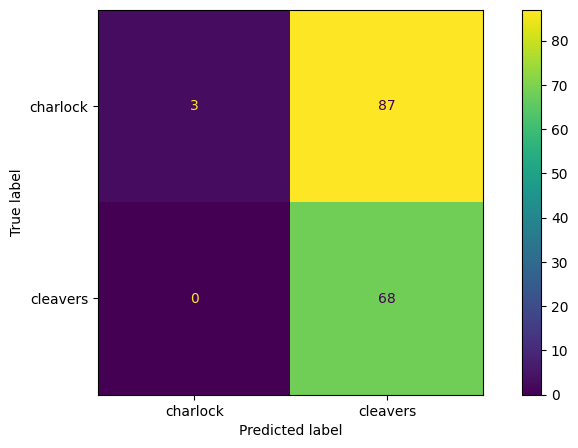

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Flatten the training data to 1D
train_data_flat = train_data.reshape(train_data.shape[0], -1)
# Flatten the test data to 1D
test_data_flat = test_data.reshape(test_data.shape[0], -1)
# Fit the KNN model on the training data
knn.fit(train_data_flat, train_labels)
# Make predictions on the test data
predictions = knn.predict(test_data_flat)
# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
# Calculate precision
precision = precision_score(test_labels, predictions, average='macro')
# Calculate recall
recall = recall_score(test_labels, predictions, average='macro')
# Calculate F1-score
f1 = f1_score(test_labels, predictions, average='macro')
# Print the scoring metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(ax=ax)
plt.show()

F1-score: 0.7462477795032789
Overall Accuracy: 0.759493670886076
Recall: 0.759493670886076
Precision: 0.7813805574608718


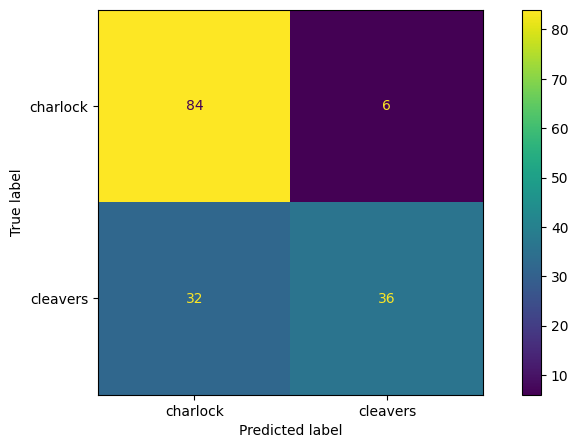

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Flatten the image data
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
test_data_flattened = test_data.reshape(test_data.shape[0], -1)
# Train the model
rf_model.fit(train_data_flattened, train_labels)
# Make predictions on the test data
predictions = rf_model.predict(test_data_flattened)
# Compute evaluation metrics
f1 = f1_score(test_labels, predictions, average='weighted')
accuracy = accuracy_score(test_labels, predictions)
recall = recall_score(test_labels, predictions, average='weighted')
precision = precision_score(test_labels, predictions, average='weighted')
# Print the evaluation metrics
print("F1-score:", f1)
print("Overall Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
# Compute the confusion matrix
cm2 = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(ax=ax)
plt.show()
